Classification Project
Why are our customers churning?

Some key questions:

Can we build an accurate model to predict churn and identify which customers are most "at risk" ?
How much does churn cost the company?
What are the combinations of services and/or contract characteristics that don't encourage customers to stay with us? Do we have specific price points that induce customers to churn?



### Deliverables included:

Jupyter Notebook Analysis:  Codeup_Classification_Project_Ada_Final,  telco_prepare.py,  summary slide (see Readme.md link), and test_probabilities.csv (see Readme.md link)

Output of test_probabilities.csv as follows (three columns):
customer_id, probability of no churn, probability of churn

Model:    
False Positives:   xxx
False Negatives:   xxx 
Accuracy:          xxx


# Acquisition
Get the data from the customers table from the telco_churn database on the codeup data science database server.


In [1]:
import warnings
warnings.filterwarnings("ignore")
from telco_prepare import get_telco_data
from telco_prepare import prep_telco_data

import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree

import scipy.stats as stats
from scipy.stats import pearsonr

import graphviz
from graphviz import Graph

import env

function peekatdata(dataframe
- creates dataframe object head_df (df of the first 5 rows) and prints contents to screen
- creates dataframe object tail_df (df of the last 5 rows) and prints contents to screen
- creates tuple object shape_tuple (tuple of (nrows, ncols)) and prints tuple to screen
- creates dataframe object describe_df (summary statistics of all numeric variables) and prints contents to screen.
- prints to screen the information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage.

In [2]:
def peekatdata(df):
    Head_df = df.head(5)
    print('Header:  \n')
    print(Head_df)
    print('Tail:  \n')
    Tail_df = df.tail(5)
    print(Tail_df)
    print('Shape:  \n')
    Shape_tuple = df.shape
    print(Shape_tuple)
    print('Describe:  \n')
    Describe_df = df.describe()
    print(Describe_df)
    print('Info:  \n')
    print(df.info())
    return 

In [3]:
df = get_telco_data()
peekatdata(df)

Header:  

  customer_id  gender  senior_citizen partner dependents  tenure  \
0  0003-MKNFE    Male               0      No         No       9   
1  0013-MHZWF  Female               0      No        Yes       9   
2  0015-UOCOJ  Female               1      No         No       7   
3  0023-HGHWL    Male               1      No         No       1   
4  0032-PGELS  Female               0     Yes        Yes       1   

  phone_service    multiple_lines  internet_service_type_id online_security  \
0           Yes               Yes                         1              No   
1           Yes                No                         1              No   
2           Yes                No                         1             Yes   
3            No  No phone service                         1              No   
4            No  No phone service                         1             Yes   

             ...             streaming_movies contract_type_id  \
0            ...                       

# Data Prep

Write a function, df_value_counts(dataframe), that takes a dataframe as input and computes and returns the values by frequency for each column. The function should decide whether or not to bin the data for the value counts.

In [4]:
DataFeatures = ['tenure_year','monthly_charges','internet_service_type_id']

In [5]:
# Need to update with decision to bin.  Function below will give us the features with more than 10 different options, which will be the features we bin.
def df_value_counts(dataframe):
    df_cols = dataframe.columns
    for col in df_cols:
        print('-----%s-----' %col)
        print(df[col].value_counts())
        
df_value_counts(df)

-----customer_id-----
6701-YVNQG    1
5702-SKUOB    1
7136-RVDTZ    1
8929-KSWIH    1
6265-FRMTQ    1
7883-ROJOC    1
2665-NPTGL    1
1465-LNTLJ    1
2621-UDNLU    1
5060-TQUQN    1
3363-EWLGO    1
6100-FJZDG    1
5630-AHZIL    1
0812-WUPTB    1
5499-ECUTN    1
0979-MOZQI    1
2560-QTSBS    1
8601-QACRS    1
7244-QWYHG    1
5666-CYCYZ    1
2971-SGAFL    1
9526-JAWYF    1
4070-OKWVH    1
2842-JTCCU    1
5394-MEITZ    1
7269-JISCY    1
5003-OKNNK    1
0993-OSGPT    1
2568-BRGYX    1
6202-JVYEU    1
             ..
2580-ASVVY    1
5485-ITNPC    1
6112-KTHFQ    1
5791-KAJFD    1
6670-MFRPK    1
5377-NDTOU    1
9208-OLGAQ    1
1485-YDHMM    1
6572-ADKRS    1
4317-VTEOA    1
8984-HPEMB    1
5917-HBSDW    1
1925-TIBLE    1
4488-PSYCG    1
2851-STERV    1
9558-IHEZX    1
2003-CKLOR    1
1941-HOSAM    1
0795-GMVQO    1
6418-HNFED    1
0727-IWKVK    1
3811-VBYBZ    1
6339-RZCBJ    1
4001-TSBTV    1
5515-RUGKN    1
2632-UCGVD    1
0027-KWYKW    1
7030-NJVDP    1
3877-JRJIP    1
6331-EWIEB    1
Na

In [6]:
def df_value_counts_bin(dataframe):
    df_cols = dataframe.columns
    features_to_bin = []
    for col in df_cols:
#         print('-----%s-----' %col)
#         print(df[col].value_counts())
        if df[col].value_counts().count() > 10:
            features_to_bin.append(col)
        print(features_to_bin[-1:])
        
df_value_counts_bin(df)

['customer_id']
['customer_id']
['customer_id']
['customer_id']
['customer_id']
['tenure']
['tenure']
['tenure']
['tenure']
['tenure']
['tenure']
['tenure']
['tenure']
['tenure']
['tenure']
['tenure']
['tenure']
['tenure']
['monthly_charges']
['total_charges']
['total_charges']
['total_charges']
['total_charges']
['total_charges']


### Handle Missing Values

Explore the data and see if there are any missing values.

Write a function that accepts a dataframe and returns the names of the columns that have missing values, and the percent of missing values in each column that has missing values.

In [7]:
def missing_values(dataframe):
    df_cols = df.columns
    col_name = []
    null_values = []
    null_percents = []
    for col in df_cols:
        value = df[col].isnull().sum()
        null_percent = value / df[col].count()
        col_name.append(col)
        null_values.append(value)
        null_percents.append(null_percent)

    null_tuples = list(zip(col_name, null_values, null_percents))
    null_df = pd.DataFrame(null_tuples, columns = ['Feature', 'Null_Count', 'Null_Percent'])

    print(type(null_df))
    print(null_df)  
    
missing_values(df)

<class 'pandas.core.frame.DataFrame'>
                     Feature  Null_Count  Null_Percent
0                customer_id           0           0.0
1                     gender           0           0.0
2             senior_citizen           0           0.0
3                    partner           0           0.0
4                 dependents           0           0.0
5                     tenure           0           0.0
6              phone_service           0           0.0
7             multiple_lines           0           0.0
8   internet_service_type_id           0           0.0
9            online_security           0           0.0
10             online_backup           0           0.0
11         device_protection           0           0.0
12              tech_support           0           0.0
13              streaming_tv           0           0.0
14          streaming_movies           0           0.0
15          contract_type_id           0           0.0
16         paperless_billin

In [8]:
missing_values(df)

<class 'pandas.core.frame.DataFrame'>
                     Feature  Null_Count  Null_Percent
0                customer_id           0           0.0
1                     gender           0           0.0
2             senior_citizen           0           0.0
3                    partner           0           0.0
4                 dependents           0           0.0
5                     tenure           0           0.0
6              phone_service           0           0.0
7             multiple_lines           0           0.0
8   internet_service_type_id           0           0.0
9            online_security           0           0.0
10             online_backup           0           0.0
11         device_protection           0           0.0
12              tech_support           0           0.0
13              streaming_tv           0           0.0
14          streaming_movies           0           0.0
15          contract_type_id           0           0.0
16         paperless_billin

The function below will sort each column and output the head and tail for that column.  This will let us see if there's something fishy about any of data in each column.

In [9]:
def sort_col_val(dataframe):
    df_cols = dataframe.columns
    for col in df_cols:
        print('Sorted by ' + str(col) + ':')
        print('Head:')
        print(df[[col]].sort_values(by=[col]).head().T)
        print(' ')
        print('Tail: ')
        print(df[[col]].sort_values(by=[col]).tail().T)
        print('-----')

In [10]:
sort_col_val(df)

Sorted by customer_id:
Head:
                   1223        0           2421        2422        2423
customer_id  0002-ORFBO  0003-MKNFE  0004-TLHLJ  0011-IGKFF  0013-EXCHZ
 
Tail: 
                   1792        4548        1222        2419        2420
customer_id  9987-LUTYD  9992-RRAMN  9992-UJOEL  9993-LHIEB  9995-HOTOH
-----
Sorted by gender:
Head:
          3521    5577    2895    2897    2899
gender  Female  Female  Female  Female  Female
 
Tail: 
        3095  3094  3092  3122  7042
gender  Male  Male  Male  Male  Male
-----
Sorted by senior_citizen:
Head:
                0     4703  4702  4701  4700
senior_citizen     0     0     0     0     0
 
Tail: 
                4542  4540  4537  2259  5117
senior_citizen     1     1     1     1     1
-----
Sorted by partner:
Head:
        0    3776 3775 3773 3772
partner   No   No   No   No   No
 
Tail: 
        4104 1385 4107 4087 7042
partner  Yes  Yes  Yes  Yes  Yes
-----
Sorted by dependents:
Head:
           0    4065 4063 4062 406

Looking at the above output, something seems odd about the lower end of total_charges.  Below, I am checking for values that are whitespace, or ' '.  We have 11 rows without an actual amount in total_charges.

In [11]:
df.loc[(df['total_charges'] == ' ')].T

,1878,1949,2029,2048,2132,6143,6569,6605,6615,6686,6895
customer_id,1371-DWPAZ,2775-SEFEE,4075-WKNIU,4472-LVYGI,5709-LVOEQ,2923-ARZLG,2520-SGTTA,3115-CZMZD,3213-VVOLG,4367-NUYAO,7644-OMVMY
gender,Female,Male,Female,Female,Female,Male,Female,Male,Male,Male,Male
senior_citizen,0,0,0,0,0,0,0,0,0,0,0
partner,Yes,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes
dependents,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
tenure,0,0,0,0,0,0,0,0,0,0,0
phone_service,No,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes
multiple_lines,No phone service,Yes,Yes,No phone service,No,No,No,No,Yes,Yes,No
internet_service_type_id,1,1,1,1,1,3,3,3,3,3,3
online_security,Yes,Yes,No,Yes,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service


We are now showing no empty cells.  Let's do a value_count to if anything strange is in our list now.  They are showing as 0.0 now.  Let's convert the total_charges column to a float and then drop these rows.

In [12]:
df_value_counts(df)

-----customer_id-----
6701-YVNQG    1
5702-SKUOB    1
7136-RVDTZ    1
8929-KSWIH    1
6265-FRMTQ    1
7883-ROJOC    1
2665-NPTGL    1
1465-LNTLJ    1
2621-UDNLU    1
5060-TQUQN    1
3363-EWLGO    1
6100-FJZDG    1
5630-AHZIL    1
0812-WUPTB    1
5499-ECUTN    1
0979-MOZQI    1
2560-QTSBS    1
8601-QACRS    1
7244-QWYHG    1
5666-CYCYZ    1
2971-SGAFL    1
9526-JAWYF    1
4070-OKWVH    1
2842-JTCCU    1
5394-MEITZ    1
7269-JISCY    1
5003-OKNNK    1
0993-OSGPT    1
2568-BRGYX    1
6202-JVYEU    1
             ..
2580-ASVVY    1
5485-ITNPC    1
6112-KTHFQ    1
5791-KAJFD    1
6670-MFRPK    1
5377-NDTOU    1
9208-OLGAQ    1
1485-YDHMM    1
6572-ADKRS    1
4317-VTEOA    1
8984-HPEMB    1
5917-HBSDW    1
1925-TIBLE    1
4488-PSYCG    1
2851-STERV    1
9558-IHEZX    1
2003-CKLOR    1
1941-HOSAM    1
0795-GMVQO    1
6418-HNFED    1
0727-IWKVK    1
3811-VBYBZ    1
6339-RZCBJ    1
4001-TSBTV    1
5515-RUGKN    1
2632-UCGVD    1
0027-KWYKW    1
7030-NJVDP    1
3877-JRJIP    1
6331-EWIEB    1
Na

In [13]:
df.dtypes

customer_id                  object
gender                       object
senior_citizen                int64
partner                      object
dependents                   object
tenure                        int64
phone_service                object
multiple_lines               object
internet_service_type_id      int64
online_security              object
online_backup                object
device_protection            object
tech_support                 object
streaming_tv                 object
streaming_movies             object
contract_type_id              int64
paperless_billing            object
payment_type_id               int64
monthly_charges             float64
total_charges                object
churn                        object
contract_type                object
internet_service_type        object
payment_type                 object
dtype: object

Success!  Total_charges is now a float.  Let's drop the rows with 0.0.

In [14]:
df.sort_values(by=['total_charges']).head().T

,2048,6143,1949,1878,6615
customer_id,4472-LVYGI,2923-ARZLG,2775-SEFEE,1371-DWPAZ,3213-VVOLG
gender,Female,Male,Male,Female,Male
senior_citizen,0,0,0,0,0
partner,Yes,Yes,No,Yes,Yes
dependents,Yes,Yes,Yes,Yes,Yes
tenure,0,0,0,0,0
phone_service,No,Yes,Yes,No,Yes
multiple_lines,No phone service,No,Yes,No phone service,Yes
internet_service_type_id,1,3,1,1,3
online_security,Yes,No internet service,Yes,Yes,No internet service


Let's create a feature that calculates estimated total_charges based on tenure * monthly_charges and gives us a percentage vs. the actual total_charges.  This will be used to check for data integrity issues.

To make things a little clearer, let's reorganize the columns so the new columns created are closer to the columns they represent/interact with.

Document your takeaways. For each variable:

- should you remove the observations with a missing value for that variable?
- should you remove the variable altogether?
- is missing equivalent to 0 (or some other constant value) in the specific case of this variable?
- should you replace the missing values with a value it is most likely to represent (e.g. Are the missing values a - result of data integrity issues and should be replaced by the most likely value?)
- Handle the missing values in the way you recommended above.

Transform churn such that "yes" = 1 and "no" = 0

Figure out a way to capture the information contained in phone_service and multiple_lines into a single variable of dtype int. Write a function that will transform the data and place in a new column named phone_id.

Figure out a way to capture the information contained in dependents and partner into a single variable of dtype int. Transform the data and place in a new column household_type_id.

Figure out a way to capture the information contained in streaming_tv and streaming_movies into a single variable of dtype int. Transform the data and place in a new column streaming_services.

Figure out a way to capture the information contained in online_security and online_backup into a single variable of dtype int. Transform the data and place in a new column online_security_backup.

Split the data into train (70%) & test (30%) samples.

In [4]:
df = prep_telco_data(df)
df.head().T

,0,1,2,3,4
customer_id,0003-MKNFE,0013-MHZWF,0015-UOCOJ,0023-HGHWL,0032-PGELS
gender,Male,Female,Female,Male,Female
senior_citizen,0,0,1,1,0
partner,No,No,No,No,Yes
dependents,No,Yes,No,No,Yes
tenure,9,9,7,1,1
phone_service,Yes,Yes,Yes,No,No
multiple_lines,Yes,No,No,No phone service,No phone service
internet_service_type_id,1,1,1,1,1
online_security,No,No,Yes,No,Yes


End of Data PREP

In [5]:
X = df.drop(['churn', 'churn_encoded'], axis=1)
y = df[['churn_encoded']]

In [6]:
train, test = train_test_split(df, train_size=0.80, random_state=123)

In [7]:
X_train = train.drop(['churn', 'churn_encoded'], axis=1)
X_test = test.drop(['churn', 'churn_encoded'], axis=1)
y_train = train[['churn_encoded']]
y_test = test[['churn_encoded']]

In [8]:
scaler = MinMaxScaler()

In [9]:
scaler.fit(X_train[['monthly_charges', 'total_charges']])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [10]:
train[['monthly_charges', 'total_charges']] = scaler.transform(train[['monthly_charges', 'total_charges']])
test[['monthly_charges', 'total_charges']] = scaler.transform(test[['monthly_charges', 'total_charges']])
train.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,payment_type,percent_var_tc_from_act_tc,churn_encoded,tenure_year,tenure_yr_int,phone_id,combined_service_id,household_type_id,streaming_services,online_security_backup
6924,8148-NLEGT,Female,0,Yes,Yes,42,Yes,Yes,0,No internet service,...,Electronic check,0.950357,0,3.500000,3,2,6,3,0,0
5249,3831-YCPUO,Female,0,Yes,Yes,72,Yes,No,2,Yes,...,Credit card (automatic),1.003705,0,6.000000,6,1,5,3,3,3
5852,6141-OOXUQ,Male,0,No,No,1,Yes,No,0,No internet service,...,Mailed check,1.000000,1,0.083333,0,1,3,0,0,0
3597,5380-WJKOV,Male,0,No,No,34,Yes,Yes,2,No,...,Electronic check,1.018779,1,2.833333,2,2,8,0,3,1
4147,8016-NCFVO,Male,1,No,No,55,Yes,Yes,2,Yes,...,Electronic check,1.003909,0,4.583333,4,2,8,0,3,3


In [11]:
X_train = train.drop(['churn', 'churn_encoded'], axis=1)
X_test = test.drop(['churn', 'churn_encoded'], axis=1)
y_train = train[['churn_encoded']]
y_test = test[['churn_encoded']]

Variable Encoding: encode the values in each non-numeric feature such that they are numeric.

Numeric Scaling: scale the monthly_charges and total_charges data. Make sure that the parameters for scaling are learned from the training data set.

# Data Exploration
Could the month in which they signed up influence churn? i.e. if a cohort is identified by tenure, is there a cohort or cohorts who have a higher rate of churn than other cohorts? (Plot the rate of churn on a line chart where x is the tenure and y is the rate of churn (customers churned/total customers)).

Are there features that indicate a higher propensity to churn? like type of internet service, type of phone service, online security and backup, senior citizens, paying more than x% of customers with the same services, etc.?

Is there a price threshold for specific services where the likelihood of churn increases once price for those services goes past that point? If so, what is that point for what service(s)?

If we looked at churn rate for month-to-month customers after the 12th month and that of 1-year contract customers after the 12th month, are those rates comparable?

Controlling for services (phone_id, internet_service_type_id, online_security_backup, device_protection, tech_support, and contract_type_id), is the mean monthly_charges of those who have churned significantly different from that of those who have not churned? (Use a t-test to answer this.)

How much of monthly_charges can be explained by internet_service_type? (hint: correlation test). State your hypotheses and your conclusion clearly.

How much of monthly_charges can be explained by internet_service_type + phone service type (0, 1, or multiple lines). State your hypotheses and your conclusion clearly.

Create visualizations exploring the interactions of variables (independent with independent and independent with dependent). The goal is to identify features that are related to churn, identify any data integrity issues, understand 'how the data works'. For example, we may find that all who have online services also have device protection. In that case, we don't need both of those. (The visualizations done in your analysis for questions 1-5 count towards the requirements below)

Each independent variable (except for customer_id) should be visualized in at least two plots, and at least 1 of those compares the independent variable with the dependent variable.

For each plot where x and y are independent variables, add a third dimension (where possible), of churn represented by color.

Use subplots when plotting the same type of chart but with different variables.

Adjust the axes as necessary to extract information from the visualizations (adjusting the x & y limits, setting the scale where needed, etc.)

Add annotations to at least 5 plots with a key takeaway from that plot.

Use plots from matplotlib, pandas and seaborn.

Use each of the following:

sns.heatmap

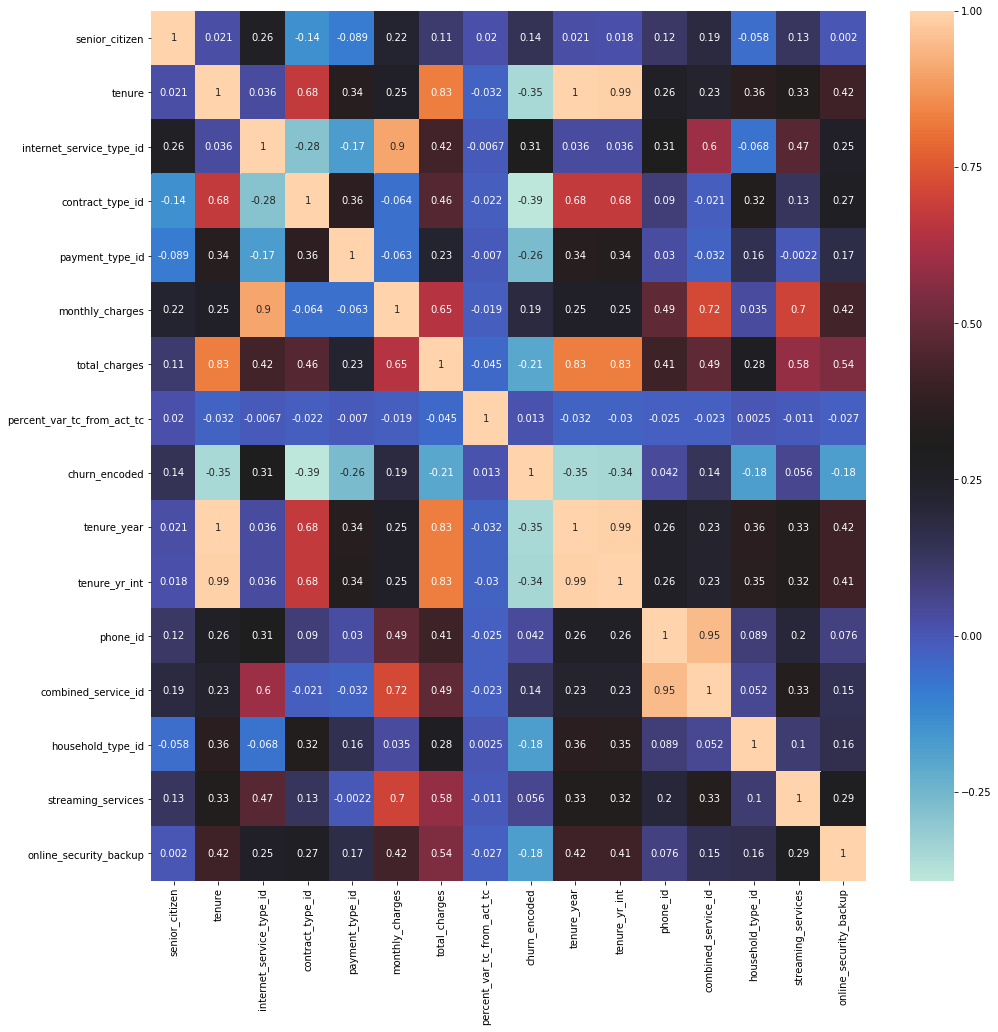

In [12]:
plt.figure(figsize=(16,16))
sns.heatmap(train.corr(), cmap='icefire', annot=True)

pd.crosstab (along with sns.heatmap)

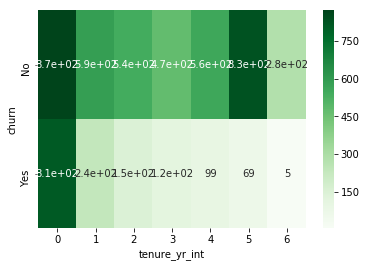

In [20]:
cross_tab = pd.crosstab(train.churn, train.tenure_yr_int)

sns.heatmap(cross_tab, annot=True, cmap='Greens')

This crosstab plot again shows that most churn customers are not up to the 1 year tenure mark.

pd.scatter_matrix

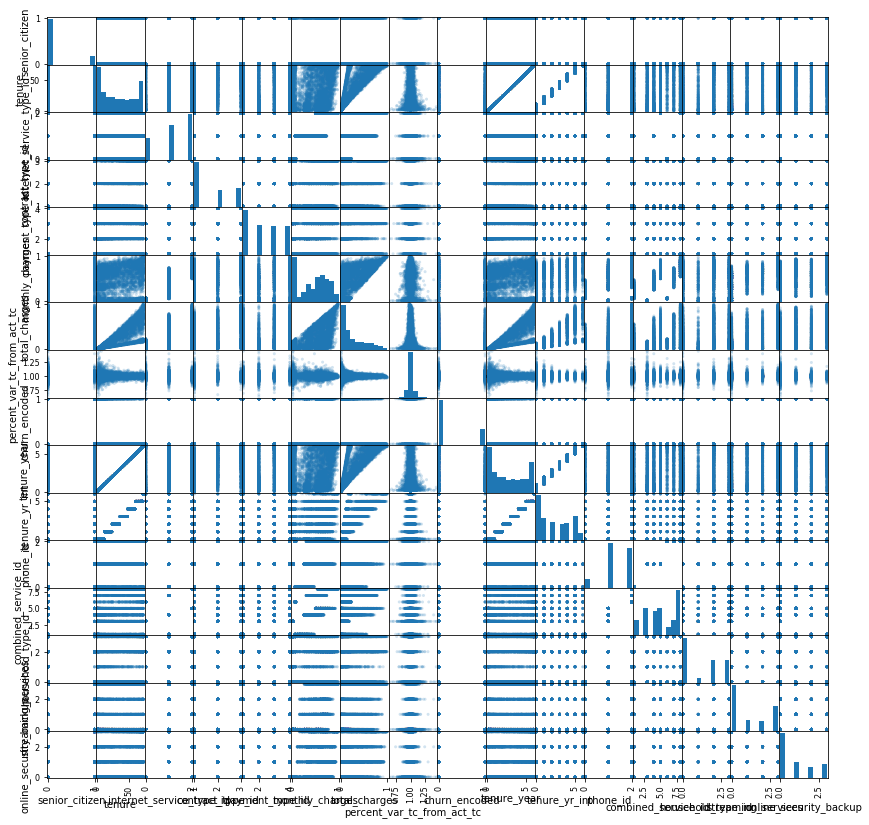

In [36]:
pd.scatter_matrix(train, alpha=0.2, figsize=(14, 14))
plt.show()

sns.barplot

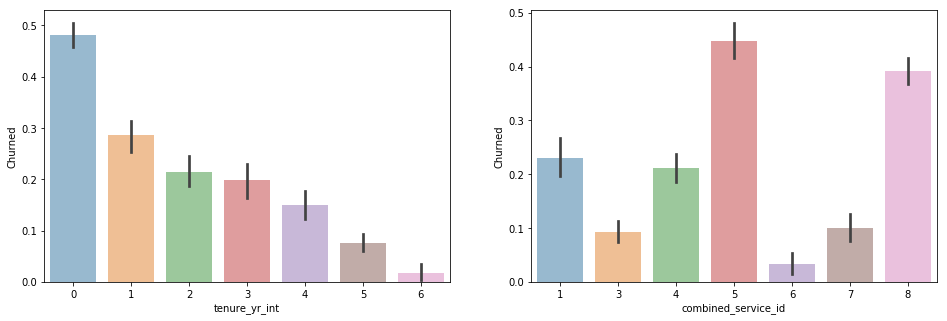

In [13]:
features = ['tenure_yr_int', 'combined_service_id']

_, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,5))

churned_rate = train.churn_encoded.mean()

for i, feature in enumerate(features):
    sns.barplot(feature, 'churn_encoded', data=train, ax=ax[i], alpha=.5)
    ax[i].set_ylabel('Churned')
    

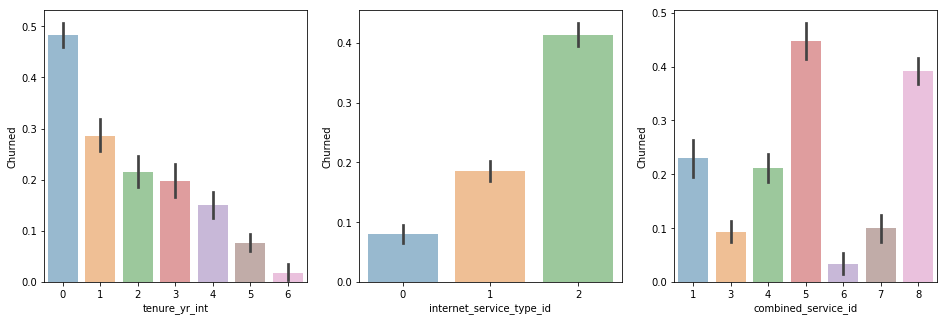

In [14]:
features = ['tenure_yr_int', 'internet_service_type_id', 'combined_service_id']

_, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,5))

churned_rate = train.churn_encoded.mean()

for i, feature in enumerate(features):
    sns.barplot(feature, 'churn_encoded', data=train, ax=ax[i], alpha=.5)
    ax[i].set_ylabel('Churned')
    

sns.swarmplot

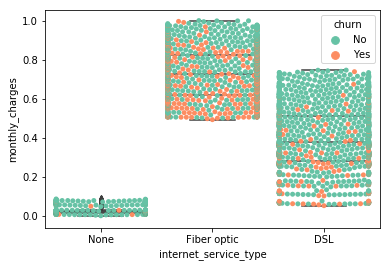

In [15]:
sns.swarmplot(x="internet_service_type", y="monthly_charges", data=train, hue="churn", palette="Set2")
ax = sns.boxplot(x="internet_service_type", y="monthly_charges", data=train,
        showcaps=True,boxprops={'facecolor':'None'},
        showfliers=True,whiskerprops={'linewidth':0})

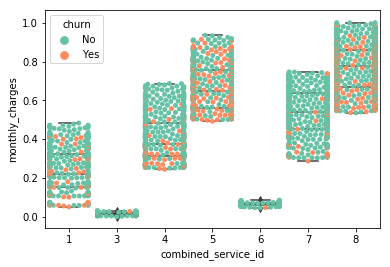

In [16]:
sns.swarmplot(x="combined_service_id", y="monthly_charges", data=train, hue="churn", palette="Set2")
ax = sns.boxplot(x="combined_service_id", y="monthly_charges", data=train,
        showcaps=True,boxprops={'facecolor':'None'},
        showfliers=True,whiskerprops={'linewidth':0})

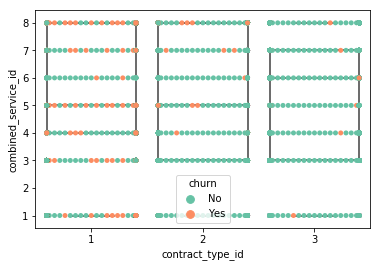

In [17]:
sns.swarmplot(x="contract_type_id", y="combined_service_id", data=train, hue="churn", palette="Set2")
ax = sns.boxplot(x="contract_type_id", y="combined_service_id", data=train,
        showcaps=True,boxprops={'facecolor':'None'},
        showfliers=True,whiskerprops={'linewidth':0})

sns.pairplot

In [ ]:
sns.pairplot(train)

It's hard to see anything with the charts above.

sns.jointplot

/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


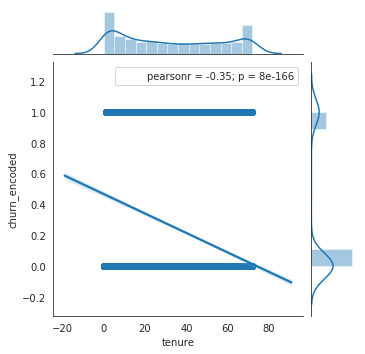

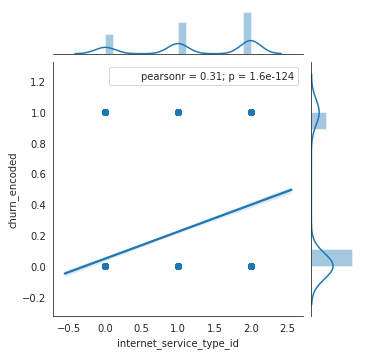

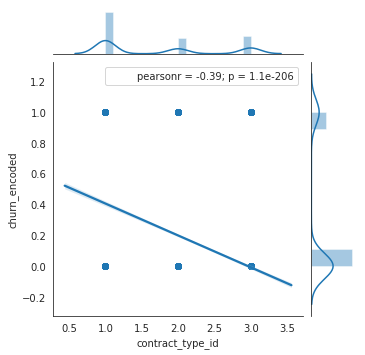

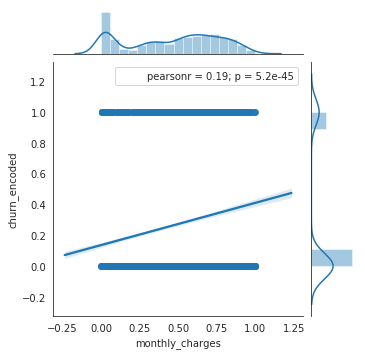

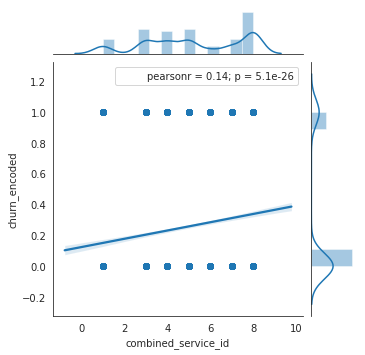

In [18]:
for i, col in enumerate(['tenure', 'internet_service_type_id', 'contract_type_id', 'monthly_charges', 'combined_service_id']):
    with sns.axes_style('white'):
        plot_number = i + 1
        series = train[col]
        j = sns.jointplot(train[col], 'churn_encoded', data=train, kind='reg', height=5)
        j.annotate(stats.pearsonr)

sns.relplot or plt.scatter

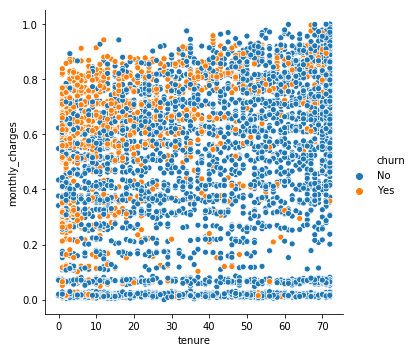

In [37]:
sns.relplot(x='tenure', y='monthly_charges', hue='churn', data=train)

With the plot above, we can see churn located more towards the higher monthly charge customers as well as lower tenure.

sns.distplot or plt.hist

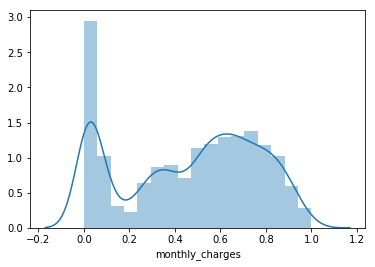

In [38]:
sns.distplot(train.monthly_charges)

With the graph above, we can see a large volume of customers paying monthly charges on the lower end and a large amount paying towards, but not quite the higher end.  The group close to the upper end are the customer churning more.  They carry a lot of weight on overall monthly revenue.

sns.boxplot

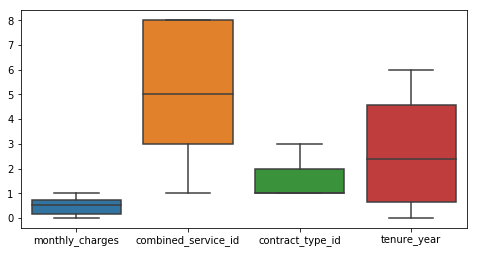

In [22]:
plt.figure(figsize=(8,4))
sns.boxplot(data=train[['monthly_charges', 'combined_service_id', 'contract_type_id', 'tenure_year']])

plt.plot

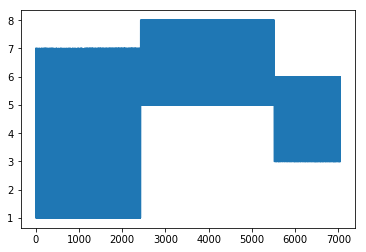

In [23]:
x = df.combined_service_id
plt.plot(x)

Use at least one more type of plot that is not included in the list above.

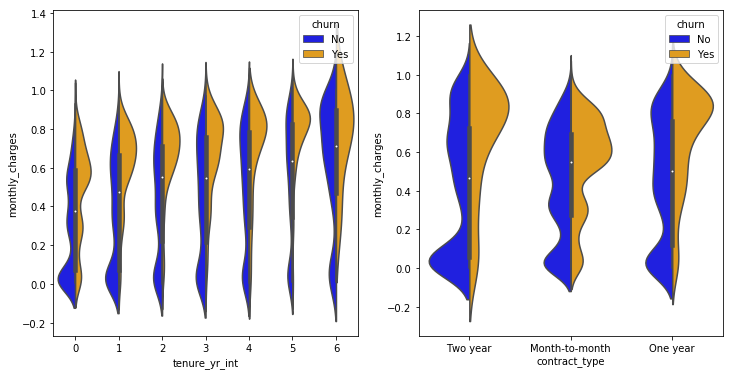

In [19]:
features = ['tenure_yr_int', 'contract_type']
feature_count = range(len(features))

_, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,6))

for i, feature in enumerate(features):
    sns.violinplot(feature, 'monthly_charges', hue='churn',
        data=train, split=True, ax=ax[i], palette=['blue','orange'])

What can you say about each variable's relationship to churn, based on your initial exploration? If there appears to be some sort of interaction or correlation, assume there is no causal relationship and brainstorm (and document) ideas on reasons there could be correlation.

Summarize your conclusions, provide clear answers to the specific questions, and summarize any takeaways/action plan from the work above.

# Modeling
Feature Selection: Are there any variables that seem to provide limited to no additional information? If so, remove them.

Train (fit, transform, evaluate) multiple different models, varying the model type and your meta-parameters.

#### The following cell contains our X variables that we will use to create models.  The features being used in that particular X are highlighted in the list.

In [24]:
X_rf_1_train = X_train[['tenure_year', 'monthly_charges', 'internet_service_type_id']]
X_rf_1_test = X_test[['tenure_year', 'monthly_charges', 'internet_service_type_id']]

X_rf_2_train = X_train[['tenure_year', 'monthly_charges', 'contract_type_id', 'combined_service_id']]
X_rf_2_test = X_test[['tenure_year', 'monthly_charges', 'contract_type_id', 'combined_service_id']]

X_rf_3_train = X_train[['tenure_year', 'monthly_charges', 'contract_type_id', 'combined_service_id']]
X_rf_3_test = X_test[['tenure_year', 'monthly_charges', 'contract_type_id', 'combined_service_id']]


## Classification/Decision Tree

In [25]:
def analyze_classification_model(X_df_train, X_df_test, y_df_train, y_df_test, string_criterion, max_depth_input):   
    features = list(X_df_train)
    
    print('Results using ' + str(string_criterion) + ' as the measure of impurity and ' + str(max_depth_input) + ' as the depth.')
    
    print('The features being used: ' + str(features))
    print('-----')

    clf = DecisionTreeClassifier(criterion=string_criterion, max_depth=max_depth_input, random_state=123)

    clf.fit(X_df_train, y_df_train)

    y_df_pred = clf.predict(X_df_train)
    print('Head of predicted on X_train:')
    print(y_df_pred[0:5])
    print('-----')

    y_df_pred_proba = clf.predict_proba(X_df_train)
    print('Head of probabilities on X_train:')
    print(y_df_pred_proba[0:5])
    print('-----')
    
    cm = pd.DataFrame(confusion_matrix(y_df_train, y_df_pred),
             columns=['Pred -', 'Pred +'], index=['Actual -', 'Actual +'])
    print(cm)
    print('-----')
    
    print(classification_report(y_df_train, y_df_pred, digits=4))
    print('-----')

    print('Accuracy of Decision Tree classifier on training set: {:.8f}'.format(clf.score(X_df_train, y_df_train)))
    print('-----')

#### The following models all use X_rf_1 which uses tenure_year, monthly_charges, and internet_service_type_id.

In [26]:
analyze_classification_model(X_rf_1_train, X_rf_1_test, y_train, y_test, 'gini', 5)

Results using gini as the measure of impurity and 5 as the depth.
The features being used: ['tenure_year', 'monthly_charges', 'internet_service_type_id']
-----
Head of predicted on X_train:
[0 0 0 0 0]
-----
Head of probabilities on X_train:
[[0.98135198 0.01864802]
 [0.96721311 0.03278689]
 [0.65734266 0.34265734]
 [0.57884972 0.42115028]
 [0.66666667 0.33333333]]
-----
          Pred -  Pred +
Actual -    3782     367
Actual +     771     714
-----
              precision    recall  f1-score   support

           0     0.8307    0.9115    0.8692      4149
           1     0.6605    0.4808    0.5565      1485

   micro avg     0.7980    0.7980    0.7980      5634
   macro avg     0.7456    0.6962    0.7129      5634
weighted avg     0.7858    0.7980    0.7868      5634

-----
Accuracy of Decision Tree classifier on training set: 0.79801207
-----


In [27]:
analyze_classification_model(X_rf_1_train, X_rf_1_test, y_train, y_test, 'gini', 4)

Results using gini as the measure of impurity and 4 as the depth.
The features being used: ['tenure_year', 'monthly_charges', 'internet_service_type_id']
-----
Head of predicted on X_train:
[0 0 0 0 0]
-----
Head of probabilities on X_train:
[[0.97307692 0.02692308]
 [0.96256684 0.03743316]
 [0.7519084  0.2480916 ]
 [0.58781362 0.41218638]
 [0.70432692 0.29567308]]
-----
          Pred -  Pred +
Actual -    3857     292
Actual +     892     593
-----
              precision    recall  f1-score   support

           0     0.8122    0.9296    0.8669      4149
           1     0.6701    0.3993    0.5004      1485

   micro avg     0.7898    0.7898    0.7898      5634
   macro avg     0.7411    0.6645    0.6837      5634
weighted avg     0.7747    0.7898    0.7703      5634

-----
Accuracy of Decision Tree classifier on training set: 0.78984736
-----


In [28]:
analyze_classification_model(X_rf_1_train, X_rf_1_test, y_train, y_test, 'entropy', 5)

Results using entropy as the measure of impurity and 5 as the depth.
The features being used: ['tenure_year', 'monthly_charges', 'internet_service_type_id']
-----
Head of predicted on X_train:
[0 0 0 0 0]
-----
Head of probabilities on X_train:
[[0.98135198 0.01864802]
 [0.98947368 0.01052632]
 [0.65734266 0.34265734]
 [0.58333333 0.41666667]
 [0.66666667 0.33333333]]
-----
          Pred -  Pred +
Actual -    3773     376
Actual +     766     719
-----
              precision    recall  f1-score   support

           0     0.8312    0.9094    0.8686      4149
           1     0.6566    0.4842    0.5574      1485

   micro avg     0.7973    0.7973    0.7973      5634
   macro avg     0.7439    0.6968    0.7130      5634
weighted avg     0.7852    0.7973    0.7865      5634

-----
Accuracy of Decision Tree classifier on training set: 0.79730209
-----


In [29]:
analyze_classification_model(X_rf_1_train, X_rf_1_test, y_train, y_test, 'entropy', 4)

Results using entropy as the measure of impurity and 4 as the depth.
The features being used: ['tenure_year', 'monthly_charges', 'internet_service_type_id']
-----
Head of predicted on X_train:
[0 0 0 0 0]
-----
Head of probabilities on X_train:
[[0.97307692 0.02692308]
 [0.96256684 0.03743316]
 [0.7519084  0.2480916 ]
 [0.58781362 0.41218638]
 [0.70432692 0.29567308]]
-----
          Pred -  Pred +
Actual -    3857     292
Actual +     892     593
-----
              precision    recall  f1-score   support

           0     0.8122    0.9296    0.8669      4149
           1     0.6701    0.3993    0.5004      1485

   micro avg     0.7898    0.7898    0.7898      5634
   macro avg     0.7411    0.6645    0.6837      5634
weighted avg     0.7747    0.7898    0.7703      5634

-----
Accuracy of Decision Tree classifier on training set: 0.78984736
-----


#### The following models all use X_rf_2 which uses tenure_year, monthly_charges, and cust_serv_type.

In [30]:
analyze_classification_model(X_rf_2_train, X_rf_2_test, y_train, y_test, 'gini', 5)

Results using gini as the measure of impurity and 5 as the depth.
The features being used: ['tenure_year', 'monthly_charges', 'contract_type_id', 'combined_service_id']
-----
Head of predicted on X_train:
[0 0 0 0 0]
-----
Head of probabilities on X_train:
[[0.98349057 0.01650943]
 [0.8974359  0.1025641 ]
 [0.62589928 0.37410072]
 [0.51757812 0.48242188]
 [0.71717172 0.28282828]]
-----
          Pred -  Pred +
Actual -    3827     322
Actual +     833     652
-----
              precision    recall  f1-score   support

           0     0.8212    0.9224    0.8689      4149
           1     0.6694    0.4391    0.5303      1485

   micro avg     0.7950    0.7950    0.7950      5634
   macro avg     0.7453    0.6807    0.6996      5634
weighted avg     0.7812    0.7950    0.7796      5634

-----
Accuracy of Decision Tree classifier on training set: 0.79499468
-----


In [31]:
analyze_classification_model(X_rf_2_train, X_rf_2_test, y_train, y_test, 'gini', 4)

Results using gini as the measure of impurity and 4 as the depth.
The features being used: ['tenure_year', 'monthly_charges', 'contract_type_id', 'combined_service_id']
-----
Head of predicted on X_train:
[0 0 0 0 0]
-----
Head of probabilities on X_train:
[[0.98643411 0.01356589]
 [0.93203883 0.06796117]
 [0.695      0.305     ]
 [0.578125   0.421875  ]
 [0.78289474 0.21710526]]
-----
          Pred -  Pred +
Actual -    3752     397
Actual +     770     715
-----
              precision    recall  f1-score   support

           0     0.8297    0.9043    0.8654      4149
           1     0.6430    0.4815    0.5506      1485

   micro avg     0.7929    0.7929    0.7929      5634
   macro avg     0.7364    0.6929    0.7080      5634
weighted avg     0.7805    0.7929    0.7824      5634

-----
Accuracy of Decision Tree classifier on training set: 0.79286475
-----


In [32]:
analyze_classification_model(X_rf_2_train, X_rf_2_test, y_train, y_test, 'entropy', 5)

Results using entropy as the measure of impurity and 5 as the depth.
The features being used: ['tenure_year', 'monthly_charges', 'contract_type_id', 'combined_service_id']
-----
Head of predicted on X_train:
[0 0 0 0 0]
-----
Head of probabilities on X_train:
[[0.98474946 0.01525054]
 [0.9893617  0.0106383 ]
 [0.62809917 0.37190083]
 [0.51757812 0.48242188]
 [0.71717172 0.28282828]]
-----
          Pred -  Pred +
Actual -    3744     405
Actual +     768     717
-----
              precision    recall  f1-score   support

           0     0.8298    0.9024    0.8646      4149
           1     0.6390    0.4828    0.5501      1485

   micro avg     0.7918    0.7918    0.7918      5634
   macro avg     0.7344    0.6926    0.7073      5634
weighted avg     0.7795    0.7918    0.7817      5634

-----
Accuracy of Decision Tree classifier on training set: 0.79179979
-----


In [33]:
analyze_classification_model(X_rf_3_train, X_rf_3_test, y_train, y_test, 'entropy', 4)

Results using entropy as the measure of impurity and 4 as the depth.
The features being used: ['tenure_year', 'monthly_charges', 'contract_type_id', 'combined_service_id']
-----
Head of predicted on X_train:
[0 0 0 0 0]
-----
Head of probabilities on X_train:
[[0.98376623 0.01623377]
 [0.96969697 0.03030303]
 [0.72081218 0.27918782]
 [0.578125   0.421875  ]
 [0.78289474 0.21710526]]
-----
          Pred -  Pred +
Actual -    3714     435
Actual +     751     734
-----
              precision    recall  f1-score   support

           0     0.8318    0.8952    0.8623      4149
           1     0.6279    0.4943    0.5531      1485

   micro avg     0.7895    0.7895    0.7895      5634
   macro avg     0.7298    0.6947    0.7077      5634
weighted avg     0.7781    0.7895    0.7808      5634

-----
Accuracy of Decision Tree classifier on training set: 0.78949237
-----


#### The following models all use X_rf_3 which uses tenure_year, monthly_charges, and cust_serv_type.

In [43]:
analyze_classification_model(X_rf_3_train, X_rf_3_test, y_train, y_test, 'entropy', 5)

Results using entropy as the measure of impurity and 5 as the depth.
The features being used: ['tenure_year', 'monthly_charges', 'contract_type_id', 'combined_service_id']
-----
Head of predicted on X_train:
[0 0 0 0 0]
-----
Head of probabilities on X_train:
[[0.98474946 0.01525054]
 [0.9893617  0.0106383 ]
 [0.62809917 0.37190083]
 [0.51757812 0.48242188]
 [0.71717172 0.28282828]]
-----
          Pred -  Pred +
Actual -    3744     405
Actual +     768     717
-----
              precision    recall  f1-score   support

           0     0.8298    0.9024    0.8646      4149
           1     0.6390    0.4828    0.5501      1485

   micro avg     0.7918    0.7918    0.7918      5634
   macro avg     0.7344    0.6926    0.7073      5634
weighted avg     0.7795    0.7918    0.7817      5634

-----
Accuracy of Decision Tree classifier on training set: 0.79179979
-----


#### Let's test our best decision tree.

In [40]:
def test_classification_model(X_df_train, X_df_test, y_df_train, y_df_test, string_criterion, max_depth_input):   
    features = list(X_df_train)
    
    print('Results using ' + str(string_criterion) + ' as the measure of impurity and ' + str(max_depth_input) + ' as the depth.')
    
    print('The features being used: ' + str(features))
    print('-----')

    clf = DecisionTreeClassifier(criterion=string_criterion, max_depth=max_depth_input, random_state=123)

    clf.fit(X_df_train, y_df_train)

    y_df_pred = clf.predict(X_df_train)
    print('Head of predicted on X_train:')
    print(y_df_pred[0:5])
    print('-----')

    y_df_pred_proba = clf.predict_proba(X_df_train)
    print('Head of probabilities on X_train:')
    print(y_df_pred_proba[0:5])
    print('-----')
    
    cm = pd.DataFrame(confusion_matrix(y_df_train, y_df_pred),
             columns=['Pred -', 'Pred +'], index=['Actual -', 'Actual +'])
    print(cm)
    print('-----')
    
    print(classification_report(y_df_train, y_df_pred, digits=4))
    print('-----')

    print('Accuracy of Decision Tree classifier on training set: {:.8f}'.format(clf.score(X_df_train, y_df_train)))
    print('-----')    
    
    print('The results of running the model on the test sample:')
    


    print('-----')
    
    y_df_pred_test = clf.predict(X_df_test)
    y_df_pred_proba_test = clf.predict_proba(X_df_test)
    
    print(classification_report(y_df_test, y_df_pred_test, digits=4))
    print('-----')
    
    cm = pd.DataFrame(confusion_matrix(y_df_test, y_df_pred_test),
             columns=['Pred -', 'Pred +'], index=['Actual -', 'Actual +'])
    print(cm)
    print('-----')

    print('Accuracy of Logistic Regression classifier on test set: {:.6f}'
     .format(clf.score(X_df_test, y_df_test)))
    print('-----')

In [41]:
test_classification_model(X_rf_1_train, X_rf_1_test, y_train, y_test, 'entropy', 5)

Results using entropy as the measure of impurity and 5 as the depth.
The features being used: ['tenure_year', 'monthly_charges', 'internet_service_type_id']
-----
Head of predicted on X_train:
[0 0 0 0 0]
-----
Head of probabilities on X_train:
[[0.98135198 0.01864802]
 [0.98947368 0.01052632]
 [0.65734266 0.34265734]
 [0.58333333 0.41666667]
 [0.66666667 0.33333333]]
-----
          Pred -  Pred +
Actual -    3773     376
Actual +     766     719
-----
              precision    recall  f1-score   support

           0     0.8312    0.9094    0.8686      4149
           1     0.6566    0.4842    0.5574      1485

   micro avg     0.7973    0.7973    0.7973      5634
   macro avg     0.7439    0.6968    0.7130      5634
weighted avg     0.7852    0.7973    0.7865      5634

-----
Accuracy of Decision Tree classifier on training set: 0.79730209
-----
The results of running the model on the test sample:
-----
              precision    recall  f1-score   support

           0     0.8197 

## Logistic Regression

In [44]:
def analyze_log_reg(X_df_train, X_df_test, y_df_train, y_df_test, solver_name):
    features = list(X_df_train)
    
    print('Results using ' + str(solver_name) + ' as the solver.')
    print('The features being used: ' + str(features))
    print('-----')

    logit = LogisticRegression(C=1, class_weight={1:2}, random_state = 123, solver=solver_name)
    logit.fit(X_df_train, y_df_train)
    print('-----')
    
    print('Coefficient: \n', logit.coef_)
    print('Intercept: \n', logit.intercept_)
    print('-----')

    y_df_pred = logit.predict(X_df_train)
    y_df_pred_proba = logit.predict_proba(X_df_train)
    print('Accuracy of Logistic Regression classifier on training set: {:.6f}'
         .format(logit.score(X_df_train, y_df_train)))
    print('-----')

    print('The results of running the model on the train sample:')

    cm = pd.DataFrame(confusion_matrix(y_df_train, y_df_pred),
                 columns=['Pred -', 'Pred +'], index=['Actual -', 'Actual +'])
    print(cm)
    print('-----')

    print(classification_report(y_df_train, y_df_pred, digits=4))
    print('-----')
    
        

In [45]:
analyze_log_reg(X_rf_1_train, X_rf_1_test, y_train, y_test, 'saga')

Results using saga as the solver.
The features being used: ['tenure_year', 'monthly_charges', 'internet_service_type_id']
-----
-----
Coefficient: 
 [[-0.54628279 -0.06922079  1.33625058]]
Intercept: 
 [-0.92029872]
-----
Accuracy of Logistic Regression classifier on training set: 0.761093
-----
The results of running the model on the train sample:
          Pred -  Pred +
Actual -    3252     897
Actual +     449    1036
-----
              precision    recall  f1-score   support

           0     0.8787    0.7838    0.8285      4149
           1     0.5360    0.6976    0.6062      1485

   micro avg     0.7611    0.7611    0.7611      5634
   macro avg     0.7073    0.7407    0.7174      5634
weighted avg     0.7883    0.7611    0.7699      5634

-----


/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [46]:
analyze_log_reg(X_rf_1_train, X_rf_1_test, y_train, y_test, 'liblinear')

Results using liblinear as the solver.
The features being used: ['tenure_year', 'monthly_charges', 'internet_service_type_id']
-----
-----
Coefficient: 
 [[-0.54661435 -0.06739301  1.33331606]]
Intercept: 
 [-0.91566834]
-----
Accuracy of Logistic Regression classifier on training set: 0.761093
-----
The results of running the model on the train sample:
          Pred -  Pred +
Actual -    3252     897
Actual +     449    1036
-----
              precision    recall  f1-score   support

           0     0.8787    0.7838    0.8285      4149
           1     0.5360    0.6976    0.6062      1485

   micro avg     0.7611    0.7611    0.7611      5634
   macro avg     0.7073    0.7407    0.7174      5634
weighted avg     0.7883    0.7611    0.7699      5634

-----


/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [47]:
analyze_log_reg(X_rf_2_train, X_rf_2_test, y_train, y_test, 'saga')

Results using saga as the solver.
The features being used: ['tenure_year', 'monthly_charges', 'contract_type_id', 'combined_service_id']
-----
-----
Coefficient: 
 [[-4.15243047e-01  2.77891439e+00 -1.01162556e+00  2.59041976e-03]]
Intercept: 
 [0.60814715]
-----
Accuracy of Logistic Regression classifier on training set: 0.752219
-----
The results of running the model on the train sample:
          Pred -  Pred +
Actual -    3180     969
Actual +     427    1058
-----
              precision    recall  f1-score   support

           0     0.8816    0.7664    0.8200      4149
           1     0.5220    0.7125    0.6025      1485

   micro avg     0.7522    0.7522    0.7522      5634
   macro avg     0.7018    0.7395    0.7113      5634
weighted avg     0.7868    0.7522    0.7627      5634

-----


/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [48]:
analyze_log_reg(X_rf_2_train, X_rf_2_test, y_train, y_test, 'liblinear')

Results using liblinear as the solver.
The features being used: ['tenure_year', 'monthly_charges', 'contract_type_id', 'combined_service_id']
-----
-----
Coefficient: 
 [[-0.41566029  2.7788442  -1.00902232  0.00323096]]
Intercept: 
 [0.60195704]
-----
Accuracy of Logistic Regression classifier on training set: 0.752396
-----
The results of running the model on the train sample:
          Pred -  Pred +
Actual -    3181     968
Actual +     427    1058
-----
              precision    recall  f1-score   support

           0     0.8817    0.7667    0.8202      4149
           1     0.5222    0.7125    0.6027      1485

   micro avg     0.7524    0.7524    0.7524      5634
   macro avg     0.7019    0.7396    0.7114      5634
weighted avg     0.7869    0.7524    0.7628      5634

-----


/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## KNN - These tend to have great accuracy on train samples, but perform poorly on test.  We will not use these.

In [49]:
def analyze_knn_binomial(X_df_train, X_df_test, y_df_train, y_df_test, n_neighbor, weight):
    features = list(X_df_train)
    
    print('Results using ' + str(weight) + ' as the measure of impurity and ' + str(n_neighbor) + ' as the number of neighbors.')
    print('The features being used: ' + str(features))
    print('-----')

    knn = KNeighborsClassifier(n_neighbors=n_neighbor, weights=weight)

    knn.fit(X_df_train, y_df_train)

    y_df_pred = knn.predict(X_df_train)
    print('Head of predicted on X_train:')
    print(y_df_pred[0:5])
    print('-----')

    y_df_pred_proba = knn.predict_proba(X_df_train)
    print('Head of probabilities on X_train:')
    print(y_df_pred_proba[0:5])
    print('-----')
    
    cm = pd.DataFrame(confusion_matrix(y_df_train, y_df_pred),
             columns=['Pred -', 'Pred +'], index=['Actual -', 'Actual +'])
    print(cm)
    print('-----')
    
    print(classification_report(y_df_train, y_df_pred, digits=4))
    print('-----')

    print('Accuracy of KNN classifier on training set: {:.8f}'.format(knn.score(X_df_train, y_df_train)))
    print('-----')

In [50]:
analyze_knn_binomial(X_rf_1_train, X_rf_1_test, y_train, y_test, 5, 'uniform')

Results using uniform as the measure of impurity and 5 as the number of neighbors.
The features being used: ['tenure_year', 'monthly_charges', 'internet_service_type_id']
-----
Head of predicted on X_train:
[0 0 0 0 0]
-----
Head of probabilities on X_train:
[[1.  0. ]
 [1.  0. ]
 [0.6 0.4]
 [0.6 0.4]
 [1.  0. ]]
-----
          Pred -  Pred +
Actual -    3823     326
Actual +     614     871
-----
              precision    recall  f1-score   support

           0     0.8616    0.9214    0.8905      4149
           1     0.7277    0.5865    0.6495      1485

   micro avg     0.8332    0.8332    0.8332      5634
   macro avg     0.7946    0.7540    0.7700      5634
weighted avg     0.8263    0.8332    0.8270      5634

-----
Accuracy of KNN classifier on training set: 0.83315584
-----


/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


In [51]:
analyze_knn_binomial(X_rf_1_train, X_rf_1_test, y_train, y_test, 6, 'uniform')

Results using uniform as the measure of impurity and 6 as the number of neighbors.
The features being used: ['tenure_year', 'monthly_charges', 'internet_service_type_id']
-----
Head of predicted on X_train:
[0 0 0 0 0]
-----
Head of probabilities on X_train:
[[1.         0.        ]
 [1.         0.        ]
 [0.66666667 0.33333333]
 [0.66666667 0.33333333]
 [0.83333333 0.16666667]]
-----
          Pred -  Pred +
Actual -    3943     206
Actual +     786     699
-----
              precision    recall  f1-score   support

           0     0.8338    0.9503    0.8883      4149
           1     0.7724    0.4707    0.5849      1485

   micro avg     0.8239    0.8239    0.8239      5634
   macro avg     0.8031    0.7105    0.7366      5634
weighted avg     0.8176    0.8239    0.8083      5634

-----
Accuracy of KNN classifier on training set: 0.82392616
-----


/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


In [52]:
analyze_knn_binomial(X_rf_1_train, X_rf_1_test, y_train, y_test, 5, 'distance')

Results using distance as the measure of impurity and 5 as the number of neighbors.
The features being used: ['tenure_year', 'monthly_charges', 'internet_service_type_id']
-----
Head of predicted on X_train:
[0 0 0 1 0]
-----
Head of probabilities on X_train:
[[1.  0. ]
 [1.  0. ]
 [0.6 0.4]
 [0.  1. ]
 [1.  0. ]]
-----
          Pred -  Pred +
Actual -    4132      17
Actual +      90    1395
-----
              precision    recall  f1-score   support

           0     0.9787    0.9959    0.9872      4149
           1     0.9880    0.9394    0.9631      1485

   micro avg     0.9810    0.9810    0.9810      5634
   macro avg     0.9833    0.9676    0.9751      5634
weighted avg     0.9811    0.9810    0.9809      5634

-----
Accuracy of KNN classifier on training set: 0.98100816
-----


/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


In [53]:
analyze_knn_binomial(X_rf_1_train, X_rf_1_test, y_train, y_test, 6, 'distance')

Results using distance as the measure of impurity and 6 as the number of neighbors.
The features being used: ['tenure_year', 'monthly_charges', 'internet_service_type_id']
-----
Head of predicted on X_train:
[0 0 0 1 0]
-----


/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


Head of probabilities on X_train:
[[1.         0.        ]
 [1.         0.        ]
 [0.66666667 0.33333333]
 [0.         1.        ]
 [1.         0.        ]]
-----
          Pred -  Pred +
Actual -    4135      14
Actual +      94    1391
-----
              precision    recall  f1-score   support

           0     0.9778    0.9966    0.9871      4149
           1     0.9900    0.9367    0.9626      1485

   micro avg     0.9808    0.9808    0.9808      5634
   macro avg     0.9839    0.9667    0.9749      5634
weighted avg     0.9810    0.9808    0.9807      5634

-----
Accuracy of KNN classifier on training set: 0.98083067
-----


## Test KNN that performed best on train set.  These are high numbers, let's hope for the best...

In [54]:
def test_knn_binomial(X_df_train, X_df_test, y_df_train, y_df_test, n_neighbor, weight):
    features = list(X_df_train)
    
    print('Results using ' + str(weight) + ' as the measure of impurity and ' + str(n_neighbor) + ' as the number of neighbors.')
    print('The features being used: ' + str(features))
    print('-----')

    knn = KNeighborsClassifier(n_neighbors=n_neighbor, weights=weight)

    knn.fit(X_df_train, y_df_train)

    y_df_pred = knn.predict(X_df_train)
    print('Head of predicted on X_train:')
    print(y_df_pred[0:5])
    print('-----')

    y_df_pred_proba = knn.predict_proba(X_df_train)
    print('Head of probabilities on X_train:')
    print(y_df_pred_proba[0:5])
    print('-----')

    print('Accuracy of KNN classifier on training set: {:.8f}'.format(knn.score(X_df_train, y_df_train)))
    print('-----')
    
    cm = pd.DataFrame(confusion_matrix(y_df_train, y_df_pred),
             columns=['Pred -', 'Pred +'], index=['Actual -', 'Actual +'])
    
    print(cm)
    print('-----')
    
    print(classification_report(y_df_train, y_df_pred, digits=4))
    print('-----')
    
    y_df_pred_test = knn.predict(X_df_test)
    y_df_pred_proba_test = knn.predict_proba(X_df_test)

    print('-----')
    
    print('The results of running the model on the test sample:')
    
    cm = pd.DataFrame(confusion_matrix(y_df_test, y_df_pred_test),
             columns=['Pred -', 'Pred +'], index=['Actual -', 'Actual +'])
    print(cm)
    print('-----')
    
    print(classification_report(y_df_test, y_df_pred_test, digits=4))
    print('-----')
    
    y_df_pred_test = knn.predict(X_df_test)
    y_df_pred_proba_test = knn.predict_proba(X_df_test)
    print('-----')
    print('Head of probabilities on X_test:')
    print(y_df_pred_proba_test[:5])
    print('Accuracy of Logistic KNN classifier on test set: {:.6f}'
     .format(knn.score(X_df_test, y_df_test)))
    print('-----')
    Probabilities_on_X_test = y_df_pred_proba_test
   

### We had some great results on the train set, but running it on the test shows that this model overfit.

In [55]:
test_knn_binomial(X_rf_1_train, X_rf_1_test, y_train, y_test, 5, 'distance')

Results using distance as the measure of impurity and 5 as the number of neighbors.
The features being used: ['tenure_year', 'monthly_charges', 'internet_service_type_id']
-----
Head of predicted on X_train:
[0 0 0 1 0]
-----
Head of probabilities on X_train:
[[1.  0. ]
 [1.  0. ]
 [0.6 0.4]
 [0.  1. ]
 [1.  0. ]]
-----
Accuracy of KNN classifier on training set: 0.98100816
-----
          Pred -  Pred +
Actual -    4132      17
Actual +      90    1395
-----
              precision    recall  f1-score   support

           0     0.9787    0.9959    0.9872      4149
           1     0.9880    0.9394    0.9631      1485

   micro avg     0.9810    0.9810    0.9810      5634
   macro avg     0.9833    0.9676    0.9751      5634
weighted avg     0.9811    0.9810    0.9809      5634

-----
-----
The results of running the model on the test sample:
          Pred -  Pred +
Actual -     862     163
Actual +     208     176
-----
              precision    recall  f1-score   support

        

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


### Let's check the lower KNN just to be safe.

In [56]:
test_knn_binomial(X_rf_1_train, X_rf_1_test, y_train, y_test, 5, 'uniform')

Results using uniform as the measure of impurity and 5 as the number of neighbors.
The features being used: ['tenure_year', 'monthly_charges', 'internet_service_type_id']
-----
Head of predicted on X_train:
[0 0 0 0 0]
-----
Head of probabilities on X_train:
[[1.  0. ]
 [1.  0. ]
 [0.6 0.4]
 [0.6 0.4]
 [1.  0. ]]
-----
Accuracy of KNN classifier on training set: 0.83315584
-----
          Pred -  Pred +
Actual -    3823     326
Actual +     614     871
-----
              precision    recall  f1-score   support

           0     0.8616    0.9214    0.8905      4149
           1     0.7277    0.5865    0.6495      1485

   micro avg     0.8332    0.8332    0.8332      5634
   macro avg     0.7946    0.7540    0.7700      5634
weighted avg     0.8263    0.8332    0.8270      5634

-----
-----
The results of running the model on the test sample:
          Pred -  Pred +
Actual -     913     112
Actual +     203     181
-----
              precision    recall  f1-score   support

         

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


### Still not all that great.

## Random Forests - RF will not be used as we will want to be able to explain our model and how it categorizes each customer.

In [57]:
def analyze_rf_binomial(X_df_train, X_df_test, y_df_train, y_df_test, string_criterion, min_sample_leaf_input, max_depth_input):
    features = list(X_df_train)
    
    print('Results using ' + str(string_criterion) + ' as the measure of impurity and ' + str(max_depth_input) + ' as max depth level and ' +str(min_sample_leaf_input) + ' as the min_sample_leaf.')
    print('The features being used: ' + str(features))
    print('-----')

    rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion=string_criterion,
                            min_samples_leaf=min_sample_leaf_input,
                            n_estimators=100,
                            max_depth=max_depth_input, 
                            random_state=123)

    rf.fit(X_df_train, y_df_train)

    y_df_pred = rf.predict(X_df_train)
    print('Head of predicted on X_train:')
    print(y_df_pred[0:5])
    print('-----')

    y_df_pred_proba = rf.predict_proba(X_df_train)
    print('Head of probabilities on X_train:')
    print(y_df_pred_proba[0:5])
    print('-----')

    print('Accuracy of rf classifier on training set: {:.8f}'.format(rf.score(X_df_train, y_df_train)))
    print('-----')
    
    cm = pd.DataFrame(confusion_matrix(y_df_train, y_df_pred),
             columns=['Pred -', 'Pred +'], index=['Actual -', 'Actual +'])
    
    print(cm)
    print('-----')
    
    print(classification_report(y_df_train, y_df_pred, digits=4))
    print('-----')
    
    y_df_pred_test = rf.predict(X_df_test)
    y_df_pred_proba_test = rf.predict_proba(X_df_test)
    print('Accuracy of RF classifier on train set: {:.6f}'
     .format(rf.score(X_df_train, y_df_train)))
    print('-----')
    

In [58]:
X_rf_1_train = X_train[['tenure_year', 'monthly_charges', 'internet_service_type_id']]
X_rf_1_test = X_test[['tenure_year', 'monthly_charges', 'internet_service_type_id']]

In [59]:
analyze_rf_binomial(X_rf_1_train, X_rf_1_test, y_train, y_test, 'entropy', 5, 6)

Results using entropy as the measure of impurity and 6 as max depth level and 5 as the min_sample_leaf.
The features being used: ['tenure_year', 'monthly_charges', 'internet_service_type_id']
-----


/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


Head of predicted on X_train:
[0 0 0 0 0]
-----
Head of probabilities on X_train:
[[0.97232302 0.02767698]
 [0.95240745 0.04759255]
 [0.67547271 0.32452729]
 [0.57494857 0.42505143]
 [0.89234935 0.10765065]]
-----
Accuracy of rf classifier on training set: 0.80209443
-----
          Pred -  Pred +
Actual -    3788     361
Actual +     754     731
-----
              precision    recall  f1-score   support

           0     0.8340    0.9130    0.8717      4149
           1     0.6694    0.4923    0.5673      1485

   micro avg     0.8021    0.8021    0.8021      5634
   macro avg     0.7517    0.7026    0.7195      5634
weighted avg     0.7906    0.8021    0.7915      5634

-----
Accuracy of RF classifier on train set: 0.802094
-----


In [60]:
analyze_rf_binomial(X_rf_1_train, X_rf_1_test, y_train, y_test, 'entropy', 8, 8)

Results using entropy as the measure of impurity and 8 as max depth level and 8 as the min_sample_leaf.
The features being used: ['tenure_year', 'monthly_charges', 'internet_service_type_id']
-----


/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


Head of predicted on X_train:
[0 0 0 0 0]
-----
Head of probabilities on X_train:
[[0.98490677 0.01509323]
 [0.9842271  0.0157729 ]
 [0.65823838 0.34176162]
 [0.53152776 0.46847224]
 [0.8863422  0.1136578 ]]
-----
Accuracy of rf classifier on training set: 0.81221157
-----
          Pred -  Pred +
Actual -    3830     319
Actual +     739     746
-----
              precision    recall  f1-score   support

           0     0.8383    0.9231    0.8786      4149
           1     0.7005    0.5024    0.5851      1485

   micro avg     0.8122    0.8122    0.8122      5634
   macro avg     0.7694    0.7127    0.7319      5634
weighted avg     0.8019    0.8122    0.8013      5634

-----
Accuracy of RF classifier on train set: 0.812212
-----


In [61]:
def test_rf_binomial(X_df_train, X_df_test, y_df_train, y_df_test, string_criterion, min_sample_leaf_input, max_depth_input):
    features = list(X_df_train)
    
    print('Results using ' + str(string_criterion) + ' as the measure of impurity and ' + str(max_depth_input) + ' as max depth level and ' +str(min_sample_leaf_input) + ' as the min_sample_leaf.')
    print('The features being used: ' + str(features))
    print('-----')

    rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion=string_criterion,
                            min_samples_leaf=min_sample_leaf_input,
                            n_estimators=100,
                            max_depth=max_depth_input, 
                            random_state=123)

    rf.fit(X_df_train, y_df_train)

    y_df_pred = rf.predict(X_df_train)
    print('Head of predicted on X_train:')
    print(y_df_pred[0:5])
    print('-----')

    y_df_pred_proba = rf.predict_proba(X_df_train)
    print('Head of probabilities on X_train:')
    print(y_df_pred_proba[0:5])
    print('-----')

    print('Accuracy of rf classifier on training set: {:.8f}'.format(rf.score(X_df_train, y_df_train)))
    print('-----')
    
    cm = pd.DataFrame(confusion_matrix(y_df_train, y_df_pred),
             columns=['Pred -', 'Pred +'], index=['Actual -', 'Actual +'])
    
    print(cm)
    print('-----')
    
    print(classification_report(y_df_train, y_df_pred, digits=4))
    print('-----')
    
    y_df_pred_test = rf.predict(X_df_test)
    y_df_pred_proba_test = rf.predict_proba(X_df_test)

    print('-----')
    
    print('The results of running the model on the test sample:')
    
    cm = pd.DataFrame(confusion_matrix(y_df_test, y_df_pred_test),
             columns=['Pred -', 'Pred +'], index=['Actual -', 'Actual +'])
    print(cm)
    print('-----')
    
    print(classification_report(y_df_test, y_df_pred_test, digits=4))
    print('-----')
    
    y_df_pred_test = rf.predict(X_df_test)
    y_df_pred_proba_test = rf.predict_proba(X_df_test)
    print('-----')
    print('Head of probabilities on X_test:')
    print(y_df_pred_proba_test[:5])
    print('Accuracy of Logistic Regression classifier on test set: {:.6f}'
     .format(rf.score(X_df_test, y_df_test)))
    print('-----')
    Probabilities_on_X_test = y_df_pred_proba_test
    return Probabilities_on_X_test
    

In [62]:
test_rf_binomial(X_rf_1_train, X_rf_1_test, y_train, y_test, 'entropy', 4, 8)

Results using entropy as the measure of impurity and 8 as max depth level and 4 as the min_sample_leaf.
The features being used: ['tenure_year', 'monthly_charges', 'internet_service_type_id']
-----


/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


Head of predicted on X_train:
[0 0 0 0 0]
-----
Head of probabilities on X_train:
[[0.97260394 0.02739606]
 [0.9861282  0.0138718 ]
 [0.65345352 0.34654648]
 [0.57981254 0.42018746]
 [0.90369781 0.09630219]]
-----
Accuracy of rf classifier on training set: 0.81434150
-----
          Pred -  Pred +
Actual -    3850     299
Actual +     747     738
-----
              precision    recall  f1-score   support

           0     0.8375    0.9279    0.8804      4149
           1     0.7117    0.4970    0.5852      1485

   micro avg     0.8143    0.8143    0.8143      5634
   macro avg     0.7746    0.7125    0.7328      5634
weighted avg     0.8043    0.8143    0.8026      5634

-----
-----
The results of running the model on the test sample:
          Pred -  Pred +
Actual -     951      74
Actual +     222     162
-----
              precision    recall  f1-score   support

           0     0.8107    0.9278    0.8653      1025
           1     0.6864    0.4219    0.5226       384

   micro

array([[0.91870922, 0.08129078],
       [0.77507033, 0.22492967],
       [0.81123556, 0.18876444],
       ...,
       [0.6655547 , 0.3344453 ],
       [0.62271871, 0.37728129],
       [0.68218415, 0.31781585]])

Compare evaluation metrics across all the models, and select the best performing model.

In [63]:
best_model = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=123)

In [64]:
best_model.fit(X_rf_1_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=123,
            splitter='best')

In [65]:
y_pred_train = best_model.predict(X_rf_1_train)
print('Head of predicted on X_train:')
print(y_pred_train[0:5])
print('-----')

Head of predicted on X_train:
[0 0 0 0 0]
-----


In [66]:
y_train_pred_proba = best_model.predict_proba(X_rf_1_train)
print('Head of probabilities on X_train:')
print(y_train_pred_proba[0:5])
print('-----')

print('Accuracy of rf classifier on training set: {:.8f}'.format(best_model.score(X_rf_1_train, y_train)))
print('-----')

Head of probabilities on X_train:
[[0.98135198 0.01864802]
 [0.98947368 0.01052632]
 [0.65734266 0.34265734]
 [0.58333333 0.41666667]
 [0.66666667 0.33333333]]
-----
Accuracy of rf classifier on training set: 0.79730209
-----


In [67]:
cm = pd.DataFrame(confusion_matrix(y_train, y_pred_train),
            columns=['Pred -', 'Pred +'], index=['Actual -', 'Actual +'])
    
print(cm)
print('-----')

          Pred -  Pred +
Actual -    3773     376
Actual +     766     719
-----


In [68]:
print(classification_report(y_train, y_pred_train, digits=4))
print('-----')

              precision    recall  f1-score   support

           0     0.8312    0.9094    0.8686      4149
           1     0.6566    0.4842    0.5574      1485

   micro avg     0.7973    0.7973    0.7973      5634
   macro avg     0.7439    0.6968    0.7130      5634
weighted avg     0.7852    0.7973    0.7865      5634

-----


In [69]:
y_pred_test = best_model.predict(X_rf_1_test)
y_pred_proba_test = best_model.predict_proba(X_rf_1_test)

print('-----')

-----


In [70]:
print('The results of running the model on the test sample:')
    
cm = pd.DataFrame(confusion_matrix(y_test, y_pred_test),
            columns=['Pred -', 'Pred +'], index=['Actual -', 'Actual +'])
print(cm)
print('-----')

The results of running the model on the test sample:
          Pred -  Pred +
Actual -     941      84
Actual +     207     177
-----


In [71]:
print(classification_report(y_test, y_pred_test, digits=4))
print('-----')

              precision    recall  f1-score   support

           0     0.8197    0.9180    0.8661      1025
           1     0.6782    0.4609    0.5488       384

   micro avg     0.7935    0.7935    0.7935      1409
   macro avg     0.7489    0.6895    0.7075      1409
weighted avg     0.7811    0.7935    0.7796      1409

-----


In [72]:
y_pred_test = best_model.predict(X_rf_1_test)
y_df_pred_proba_test = best_model.predict_proba(X_rf_1_test)
print('-----')
print('Head of probabilities on X_test:')
print(y_df_pred_proba_test[:5])
print('Accuracy of Logistic Regression classifier on test set: {:.6f}'
    .format(best_model.score(X_rf_1_test, y_test)))
print('-----')
Probabilities_on_X_test = y_pred_proba_test

-----
Head of probabilities on X_test:
[[0.95189873 0.04810127]
 [0.9212963  0.0787037 ]
 [0.93478261 0.06521739]
 [0.93650794 0.06349206]
 [0.98135198 0.01864802]]
Accuracy of Logistic Regression classifier on test set: 0.793471
-----


### Test the final model (transform, evaluate) on your out-of-sample data (the testing data set). Summarize the performance. Interpret your results.

Summary of our best model run against the test sample:

The overall accuracy of the model on the test sample is 78.7%.  The accuracy for the train set was 79.1%.  This means that overall, this model is consistent.
    
Given the customer did churn, our precision is 67%.  
Given the customer did not churn, our precision is 81%.

Given that the model predicted a customer to churn, the recall is 42%.  This is the true positive rate.
Given that the model predicted a customer to not churn, the recall is 92%.

The false positive rate is 33%.  This is saying that of the predicted churns, the model was not accurate on 33%.

This tells us that the model is better at predicting that a customer does not churn.  That being said, a reasonable result of who to focus our efforts on by removing the most probable to not churn and then focusing on the remaining customers.

### Let's work to turn the probabilities from an array to a dataframe.  Then we can create a dataframe with the customer id and merge the two.  This will be the df that we can export to a CSV to show probabilities of churn on the test sample.

In [73]:
probabilities_alone = pd.DataFrame({'No_Churn_Prob':y_pred_proba_test[:,0], 'Churn_Prob':y_pred_proba_test[:,1]})
probabilities_alone.head()

,No_Churn_Prob,Churn_Prob
0,0.951899,0.048101
1,0.921296,0.078704
2,0.934783,0.065217
3,0.936508,0.063492
4,0.981352,0.018648


In [74]:
prediction = pd.DataFrame({'Prediction':y_pred_test})
prediction.head()

,Prediction
0,0
1,0
2,0
3,0
4,0


In [75]:
customer_id = test[['customer_id']]
customer_id.head()

,customer_id
941,7672-VFMXZ
1404,3229-USWAR
5515,9958-MEKUC
3684,5828-DWPIL
7017,9585-KKMFD


In [76]:
customer_id = customer_id.reset_index(drop=True)
customer_id.head()

,customer_id
0,7672-VFMXZ
1,3229-USWAR
2,9958-MEKUC
3,5828-DWPIL
4,9585-KKMFD


In [77]:
probabilities_alone.shape

(1409, 2)

In [78]:
customer_id.shape

(1409, 1)

In [79]:
y_pred_test.shape

(1409,)

In [80]:
test_churn_probabilities = pd.concat([customer_id, probabilities_alone, prediction], axis=1)
test_churn_probabilities.head(10)

,customer_id,No_Churn_Prob,Churn_Prob,Prediction
0,7672-VFMXZ,0.951899,0.048101,0
1,3229-USWAR,0.921296,0.078704,0
2,9958-MEKUC,0.934783,0.065217,0
3,5828-DWPIL,0.936508,0.063492,0
4,9585-KKMFD,0.981352,0.018648,0
5,5575-TPIZQ,0.762195,0.237805,0
6,6557-BZXLQ,0.555556,0.444444,0
7,4302-ZYFEL,1.000000,0.000000,0
8,4976-LNFVV,0.855392,0.144608,0
9,1226-IENZN,0.384439,0.615561,1


In [81]:
export_csv = test_churn_probabilities.to_csv(r'test_probabilities.csv')

#### Let's visualize what the decision tree is evaluating.

In [82]:
dot_data = tree.export_graphviz(best_model, out_file=None) 
graph = graphviz.Source(dot_data) 

graph.render('churn_decision_tree', view=True)

'churn_decision_tree.pdf'